Importing the necesary liberaries

In [1]:
import numpy as np 
import pandas as pd 
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import plotly.express as px

Loading the data as a DataFrame 

In [2]:
df = pd.read_csv('AccidentesAviones.csv', index_col=0)

## Data Examination

In [3]:
df.head()

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
df.columns

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5007 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  ground   

Since all the columns names are not in the same langugue, firts I translate the ones that are in spanish to english and then I rename the ones I considere that have a confussing name.

In [6]:
df=df.rename(columns={"fecha": "date", "HORA declarada": "crash_time", 'OperadOR':'operator', 'PASAJEROS A BORDO':'passengers_aboard','cantidad de fallecidos':'fatalities'})
df=df.rename(columns={'cn_ln':'aircraft_id','ac_type':'type','flight_no':'flight_id','Ruta':'route','route':'route_2' })

Add the column 'country' with information extracted from the column 'route'. Some celds from 'country' will share the same information with 'route', since not all rows content the country where the crash took place. This will be taking into acount at the moment of those columns examination.

In [7]:
df['country']  = df['route'].str.split(',').str[-1].str.strip()

Onece all the column names are normalized I define each column meaning:

I could only define them names after examinating and analysing a couple of rows data, and the information I could get from them. My conclution was the following.

# Data Diccionary:

- aircraft_id:   specifique aircraft identification
- all_aboard:   cuantity of all the people aboard at the crash moment.
- country_state: the country or steate where the crash took place.(this information is taken from route)
- crash_time :  Time of the crash (military format)
- crew_aboard :     only members of the crew aboard
- crew_fatalities :     number of only crew fatalities
- date :    date when the crash took place
- fatalities :   number of fatalities
- flight_id :   Flight number
- ground :      Total number of people killed by the accident on the ground (people who were not on board)
- operator:     Plane's airline or simply the flight operator 
- passengers_aboard:   only pasengers abord.
- passenger_fatalities :    number of pasengers fatalities
- registration:     registration of the aircraft(alphanumeric series of characters similar to a car license plate)
- route :     The flight path taken.
- route_2 :     Additional information about the type of flight, or about the origin and/or destination of the flight.
- survived:  Number of people aboard who lived after the crash(the people aboard take into acount the passengers and the crew)
- survival rate:    The survivival percent(calculate from 'survived' and 'all_aboard)
- summary :     Brief description of the case
- type:     specific type of the aircraft (vehicule)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   crash_time            5008 non-null   object
 2   route                 5008 non-null   object
 3   operator              5008 non-null   object
 4   flight_id             5008 non-null   object
 5   route_2               5007 non-null   object
 6   type                  5008 non-null   object
 7   registration          5008 non-null   object
 8   aircraft_id           5008 non-null   object
 9   all_aboard            5008 non-null   object
 10  passengers_aboard     5008 non-null   object
 11  crew_aboard           5008 non-null   object
 12  fatalities            5008 non-null   object
 13  passenger_fatalities  5008 non-null   object
 14  crew_fatalities       5008 non-null   object
 15  ground                5008 non-null   objec

Seeing that all the columns have an "object" Dtype, I specify the type I consider should be insted

In [9]:
df['route']=df['route'].astype('category')
df['operator']=df['operator'].astype('category')
df['route_2']=df['route_2'].astype('category')
df['type']=df['type'].astype('category')
df['registration']=df['registration'].astype('category')
df['summary']=df['summary'].astype('category')
df['flight_id']=df['flight_id'].astype('category')
df['aircraft_id']=df['aircraft_id'].astype('category')
df['country']=df['country'].astype('category')


Replace the value '?' as 'Unknown' or 'No Summary' in the summary column case, and as None in the flight_id and aircraft_id column case:

In [10]:
df['route'].replace('?','Unknown', inplace= True)
df['operator'].replace('?','Unknown', inplace= True)
df['route_2'].replace('?','Unknown', inplace= True)
df['type'].replace('?','Unknown', inplace= True)
df['registration'].replace('?','Unknown', inplace= True)
df['summary'].replace('?','No summary', inplace= True)
df['flight_id'].replace('?',None, inplace= True)
df['aircraft_id'].replace('?',None, inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   date                  5008 non-null   object  
 1   crash_time            5008 non-null   object  
 2   route                 5008 non-null   category
 3   operator              5008 non-null   category
 4   flight_id             1326 non-null   category
 5   route_2               5007 non-null   category
 6   type                  5008 non-null   category
 7   registration          5008 non-null   category
 8   aircraft_id           4341 non-null   category
 9   all_aboard            5008 non-null   object  
 10  passengers_aboard     5008 non-null   object  
 11  crew_aboard           5008 non-null   object  
 12  fatalities            5008 non-null   object  
 13  passenger_fatalities  5008 non-null   object  
 14  crew_fatalities       5008 non-null   object  
 15  ground   

Replace the value '?' as Nan in all the following columns so then I can specify their Dtype as int64

In [12]:
for i,e in enumerate(df['fatalities']):
    if e == '?':
        df['fatalities'][i]= np.nan
df['fatalities']=pd.Series( df['fatalities'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['passengers_aboard']):
    if e == '?':
        df['passengers_aboard'][i]= np.nan
df['passengers_aboard']=pd.Series( df['passengers_aboard'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['crew_aboard']):
    if e == '?':
        df['crew_aboard'][i]= np.nan
df['crew_aboard']=pd.Series( df['crew_aboard'], dtype=pd.Int64Dtype())

for i,e in enumerate(df['passenger_fatalities']):
    if e == '?':
        df['passenger_fatalities'][i]= np.nan
df['passenger_fatalities']=pd.Series( df['passenger_fatalities'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['ground']):
    if e == '?':
        df['ground'][i]= np.nan
df['ground']=pd.Series( df['ground'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['crew_fatalities']):
    if e == '?':
        df['crew_fatalities'][i]= np.nan
df['crew_fatalities']=pd.Series( df['crew_fatalities'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['all_aboard']):
    if e == '?':
        df['all_aboard'][i]= np.nan
df['all_aboard']=pd.Series( df['all_aboard'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['crash_time']):
    if e == '?':
        df['crash_time'][i]= np.nan
df['crash_time']=pd.Series( df['crash_time'], dtype=pd.Int64Dtype())
for i,e in enumerate(df['flight_id']):
    if e == '?':
        df['flight_id'][i]= np.nan
df['flight_id']=pd.Series( df['flight_id'], dtype=pd.Int64Dtype())

C:\Users\trini\AppData\Local\Temp\ipykernel_38840\4271399265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'][i]= np.nan
C:\Users\trini\AppData\Local\Temp\ipykernel_38840\4271399265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passengers_aboard'][i]= np.nan
C:\Users\trini\AppData\Local\Temp\ipykernel_38840\4271399265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crew_aboard'][i]= np.nan
C:\User

Check the Dytpe of each column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   date                  5008 non-null   object  
 1   crash_time            3504 non-null   object  
 2   route                 5008 non-null   category
 3   operator              5008 non-null   category
 4   flight_id             1326 non-null   category
 5   route_2               5007 non-null   category
 6   type                  5008 non-null   category
 7   registration          5008 non-null   category
 8   aircraft_id           4341 non-null   category
 9   all_aboard            4991 non-null   Int64   
 10  passengers_aboard     4787 non-null   Int64   
 11  crew_aboard           4789 non-null   Int64   
 12  fatalities            5000 non-null   Int64   
 13  passenger_fatalities  4773 non-null   Int64   
 14  crew_fatalities       4773 non-null   Int64   
 15  ground   

In [14]:
df['flight_id'].isna().sum()

3682

In [15]:
df['crash_time'].isnull().sum()

1504

Since the 'flight_id' column has 74% null data, I consider it appropriate to remove the entire column, otherwise it would hinder the analysis more than it would help.

Since the 'crash_time' column has 31% null data, I consider it appropriate to remove the entire column, otherwise it would hinder the analysis more than it would help.


In [16]:
df=df.drop(columns=['flight_id','crash_time'])

Check if there is any duplicated row:

In [17]:
df.duplicated().sum()

0

Normalizing the Date

- Converting the column date to a date type
- adding three columns for only the year, the month and the day
- adding a column to indicate in wich decade the crash took place

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['date']=pd.DatetimeIndex(df['date'])

In [19]:
df_date_index=df.set_index('date')#----> in case I need to analys only some dates.

In [20]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['decade'] = (df['year']) // 10 * 10

To see the period of time I am examinating

In [21]:
print(df['year'].max())#max 2021
print(df['year'].min())#min 1908

2021
1908


# The Crashes Quantity

<b>How many crash occurred each year?

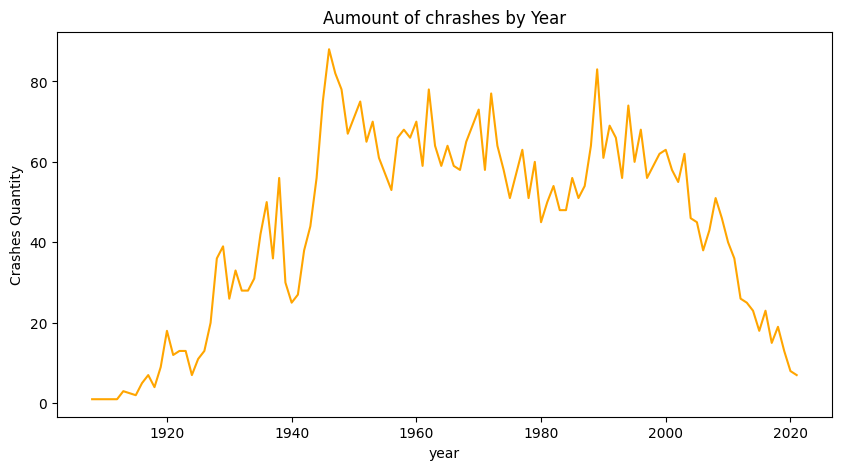

In [22]:
dfyear=df.groupby(df['year']).size()
dfyear.plot(figsize=[10, 5],title='Aumount of chrashes by Year', xlabel='year',ylabel='Crashes Quantity', color='orange');

This graph covers the timeline between 1908 and 2021, and it shows the total crashes that ocurred per year during that period of time. From this picture we can infer the following analysis:

The first peak of the graph appears at the late 10's and the early of the 20's, this coincides with the First World War, where there was a first great technological revolution, which could have generated a series of failed experiments and consequently turn into a crashes increase. Between the 1920's and 1940's decades, the number of crashes went up and down but could not go back under the 20 chrashes per year, the reason may be because of the great advancements the in aircraft technology which maked it clear that the air would become a new means of transportation.
From the early 40's till the 50's the most remacable peak took place. This is probably directly related with the Second World War, which took place between 1939 and 1945. After it, it also took place the Cold War and with it the space race. This historical phenomenon provoked not only a aricraft technological advance, but also an increase in air accidents. Then we can see how the number of crashes do not go below 40 until the 2000, what may be due to the increase in the use of commercial flights.
Since the 2000 the aumount of air crashes decreased significaly till achieve a number below 20. The reason might be the increase of technology and aviation safety and airplanes security, that help to prevent this crashes.

<b>How many Crashes per Decade?

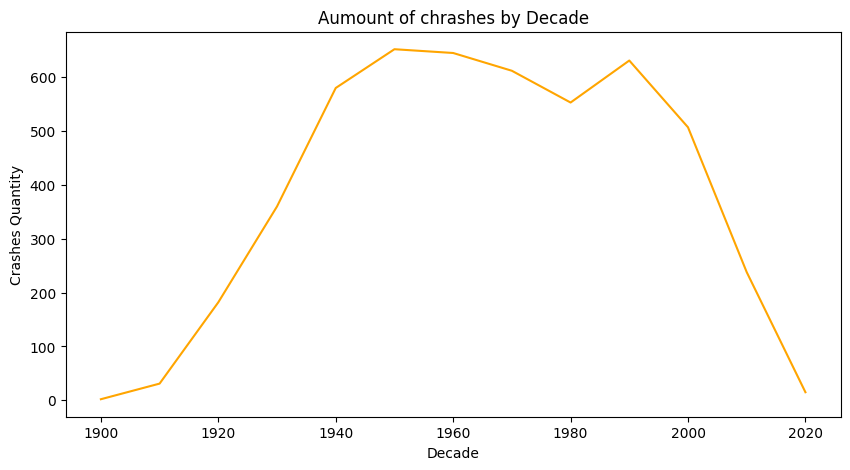

In [23]:
dfdecade=df.groupby(df['decade']).size()
dfdecade.plot(figsize=[10, 5],title='Aumount of chrashes by Decade', xlabel='Decade',ylabel='Crashes Quantity', color='orange');

To achieve a general analysis, insted of taking into acount the year I decided to see the increse and decrese of the crashes cuantity throuth the decades:

Now we can esaly see the increse of the air crashes between the 1920 and 1945. It also helps to remark the decrese of crashes during the 60's and 70's, which change during the 80's, were it is clear a increse. However, it dramaticaly change again from the 90's onwards.

<b>What year has the highest number of aircraft crashes?

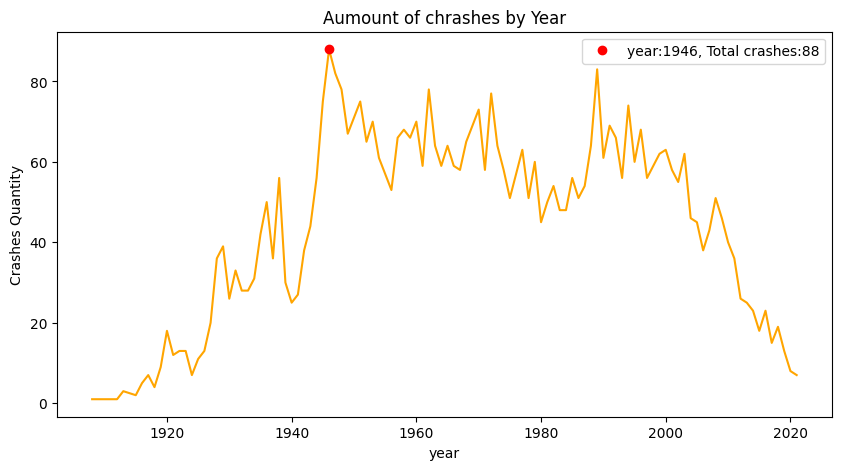

In [24]:
dfyear=df.groupby(df['year']).size()
dfyear.plot(figsize=[10, 5],title='Aumount of chrashes by Year', xlabel='year',ylabel='Crashes Quantity', color='orange')
dfyears=dfyear.reset_index(name='values')
e=[(dfyears['year'][i],dfyears['values'].max()) for i, e in enumerate(dfyears['values']) if dfyears['values'][i]== dfyears['values'].max()]
y=dfyears['values'].max()
x=e[0][0]
plt.plot(x, y, 'o', color='red',label=f'year:{(e[0][0])}, Total crashes:{e[0][1]}')
plt.legend();

In the graph above, the red point indicates the year with the higher number of crashes. The legend on the rigth,  specify the year:1946, and the total crashes: 88, that took place in the said year.

<b>Top 5 Decades with highest amount of crashes

In [25]:
dfdecade=pd.DataFrame(df.groupby(df['decade']).size()).reset_index().sort_values(by=0)[::-1].head(5)
dfdecade.index = range(1, len(dfdecade)+1)
dfdecade=dfdecade.rename(columns={0:'Total Crashes'})
dfdecade

,decade,Total Crashes
1,1950,652
2,1960,645
3,1990,631
4,1970,612
5,1940,580


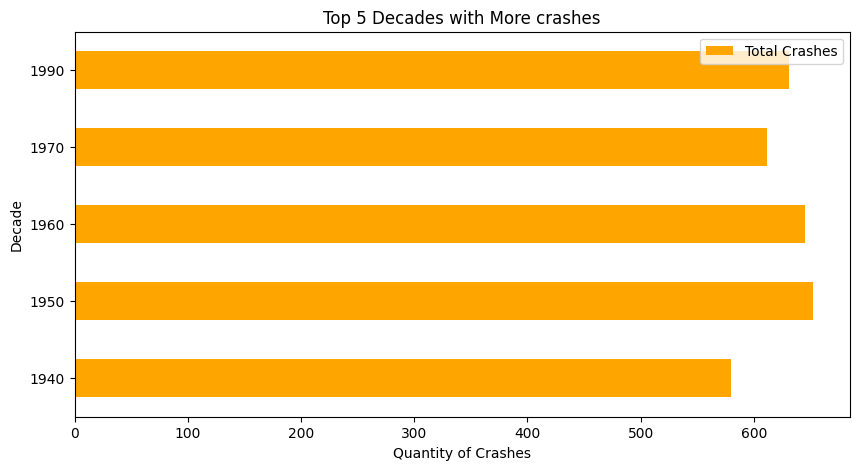

In [26]:
dfdecade.sort_values(by='decade').plot(kind='barh', stacked=True ,ylabel='Decade',xlabel='Quantity of Crashes', title= 'Top 5 Decades with More crashes', color='orange',figsize=[10, 5],y='Total Crashes',x='decade');

This table and bars grafic confirms what it was infered previuosly in the 'Aumount of Crashes by decade' graph, the decades between 1940 to 1990 are the top 5 decades when the majority crashes ocurred. The 1950's own the first place, followed by 1960s, only 7 crashes bellow. After the 50s the quantity of air crashes never achive a number as high as 652, it had a peak during the 1990s, with a total of 631 crashes, but since then this number only decrese. What I concluded from this analysis is that since the diferents aircrafts started to be used as a mean of transport, the amount of crashes incresed. Cleary the first and second world war afected directly in the number of air crashes making it achive the (actual) maximum peak in 1946, a yaer after the end of the Sencond World war. Tthe society migth have learned from the amount of accidents and have taken security precautions, in parallel with technological advances, all along the decades. The data shows that nowadays there are not even 20 crashes per year, this is proof that society has become aware of the seriousness of these events and has also taken measures to solve them.

<b>Top 5 Decades with less amount of crashes

In [27]:
dfdecade=pd.DataFrame(df.groupby(df['decade']).size()).reset_index().sort_values(by=0).head(5)
dfdecade.index = range(1, len(dfdecade)+1)
dfdecade=dfdecade.rename(columns={0:'Total Crashes'})
dfdecade

,decade,Total Crashes
1,1900,2
2,2020,15
3,1910,31
4,1920,182
5,2010,238


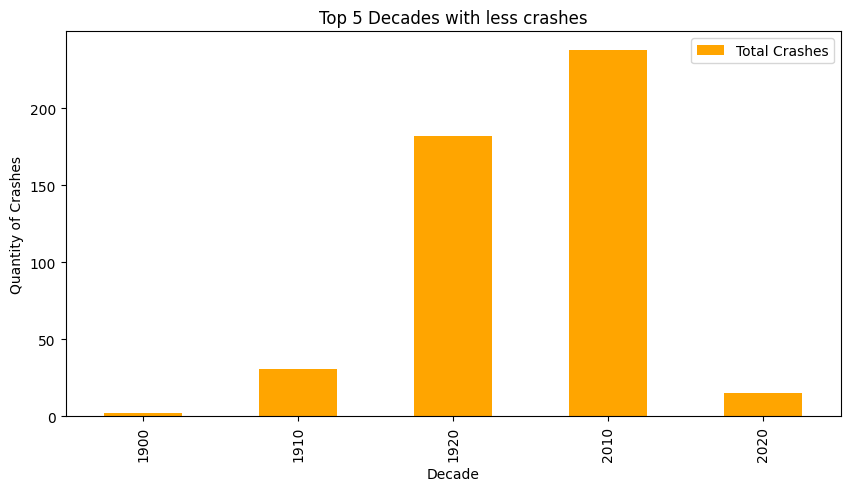

In [28]:
dfdecade.sort_values(by='decade').plot(kind='bar', stacked=True ,xlabel='Decade',ylabel='Quantity of Crashes', title= 'Top 5 Decades with less crashes', color='orange',figsize=[10, 5],y='Total Crashes',x='decade');

In coclusion, from these last figures, the period of time between 1940 to 1990 suffered the majority of the aircraft crashes all along the 20th and early 21st centuries. This could means that thanks to technological advances the diferents aircrafts security improved over the years. I come out with conclution because the years with less crashes are at the begginig and the end of the period of time taked into acount.

# Crashes Location

Considering there are only 5 rows with unkown route, procid to analys the diferent places where the crashes took place.

In [29]:
df['route'].value_counts()['Unknown'] #To count how many Unknow values where in the route column

5

<b>Where did the aircfats crashes happened the most?

In [30]:
df['route'].value_counts().sort_values()[::-1].head(1)

route
Moscow, Russia    16
Name: count, dtype: int64

In [31]:
tenCitysMost=pd.DataFrame(df['route'].value_counts().sort_values()[::-1].head(10))
tenCitysMost=tenCitysMost.rename(columns={'count':'Total Crashes', 'route':'Location'})
tenCitysMostranking= tenCitysMost.copy()

<b>Ranking of the Top 10 Cities where more air crashes took place.

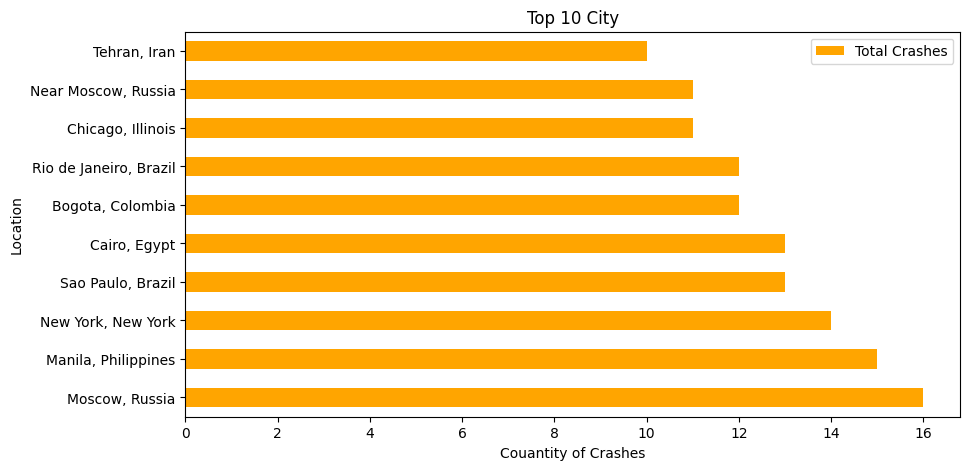

In [32]:
tenCitysMost.plot(kind='barh', stacked=True ,ylabel='Location',xlabel='Couantity of Crashes', title= 'Top 10 City', color='orange',figsize=[10, 5]);

The previous graph is print to show in a more visual way the small diferent between the cuantity of the crashes in the Top 10 Locations with more air crashes in the world, during the period of time between 1908 to 2021. The diferent between Moscow, Russia and Manila, Philippines seems to be just a single crash, however, that would change if the second Location in the graph (Near Moscow Russia) was consider as Moscow as well. Since the word "Near" is not quite specific, and I can not tell how much "near" means, I decided to keep it as a diferent category.
Although, if the viewer prefer to join both Locations as one: Moscow,Russia will be the undeniable first place of this ranking, with a total of 27 air crashes, between 1908 and 2021. The caouse of this could be the relevant participation Russia had during the first and second War, and the spacial Race during the cold war.

<b> Analysing  'Moscow, Russia' crashes: <b>

Since this Location is the one with the bigest number of crash event, lets do a World Cloud of them summaries

In [33]:
dfRussiaMoscow=df[df['route']=='Moscow, Russia']

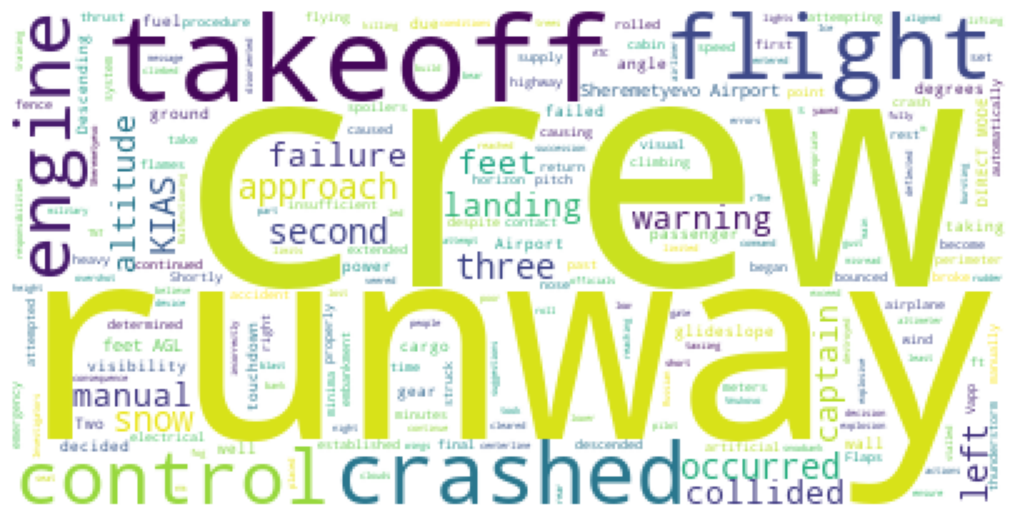

In [34]:
text = str(dfRussiaMoscow.summary.tolist())

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('Moscow')

wc = WordCloud(background_color="white", max_words=200,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

It is claer  that the word most repeted in the Moscow,Russia summaries are:
- crew
- runway
- takeoff

Whitout taking into acount:
- aircraft
- plane
- Moscow

<b>Ranking of the Top 10 Countries where more air crashes took place.

In [35]:
tenCountrysMost=pd.DataFrame(df['country'].value_counts().sort_values()[::-1].head(10))
tenCountrysMost=tenCountrysMost.rename(columns={'count':'Total Crashes', 'country':'Location'})
tenCountrysMostranking= tenCountrysMost.copy()
tenCountrysMostranking['Ranking']=range(1, len(tenCountrysMostranking)+1)
tenCountrysMostranking=tenCountrysMostranking.reset_index().rename(columns={'route':'Location'})
tenCountrysMostranking.set_index('Ranking')

,country,Total Crashes
Ranking,,
1,Russia,254
2,Brazil,175
3,Colombia,151
4,Canada,129
5,France,125
6,California,116
7,India,104
8,Alaska,104
9,England,101


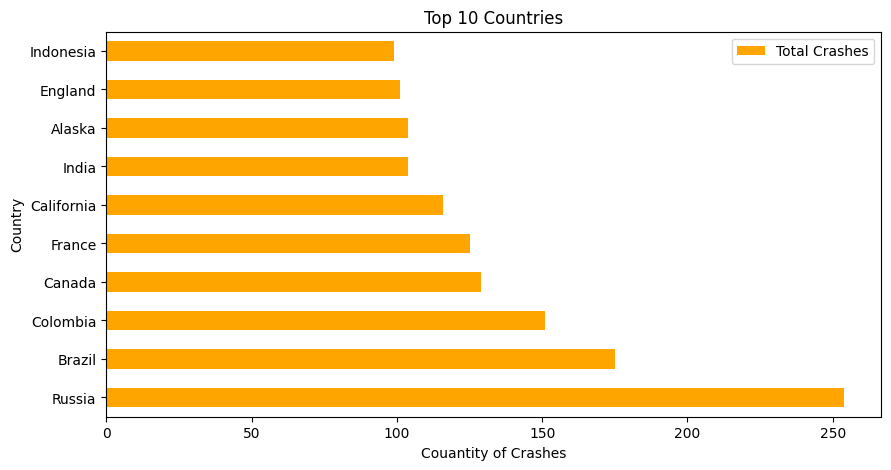

In [36]:
tenCountrysMost.plot(stacked=True,kind='barh',figsize=[10, 5] ,ylabel='Country',xlabel='Couantity of Crashes', title= 'Top 10 Countries', color='orange');

In this graphic is not taking into acount the city of the crash, but the country. The orange bars show the number of crashes that happend in each country, thanks to the graph, it is clear at first sight that Russia wins the first place at the Top 10 Countries with more crashes Ranking, with a total crashes higher than 250, all along the 20th and 21st century. It is not surprising that this powerful and enormous country is the head in this ranking, because of their important and notable intervention in this wordl hystory.  

# Aircraft Type

<b> What type of aircraft crashes the most alogn the 20th and 21st century?

Top 10 Aircraft Types

In [37]:
tenCountrysMost=pd.DataFrame(df['type'].value_counts().sort_values()[::-1].head(10))
tenCountrysMost=tenCountrysMost.rename(columns={'count':'Total Crashes'})
tenCountrysMostranking= tenCountrysMost.copy()
tenCountrysMostranking['Ranking']=range(1, len(tenCountrysMostranking)+1)
tenCountrysMostranking=tenCountrysMostranking.reset_index().rename(columns={'type':'Aircraft Type'})
tenCountrysMostranking.set_index('Ranking')

,Aircraft Type,Total Crashes
Ranking,,
1,Douglas DC-3,333
2,de Havilland Canada DHC-6 Twin Otter 300,81
3,Douglas C-47A,70
4,Douglas C-47,64
5,Douglas DC-4,41
6,Yakovlev YAK-40,35
7,Antonov AN-26,35
8,Junkers JU-52/3m,30
9,Douglas DC-6B,27


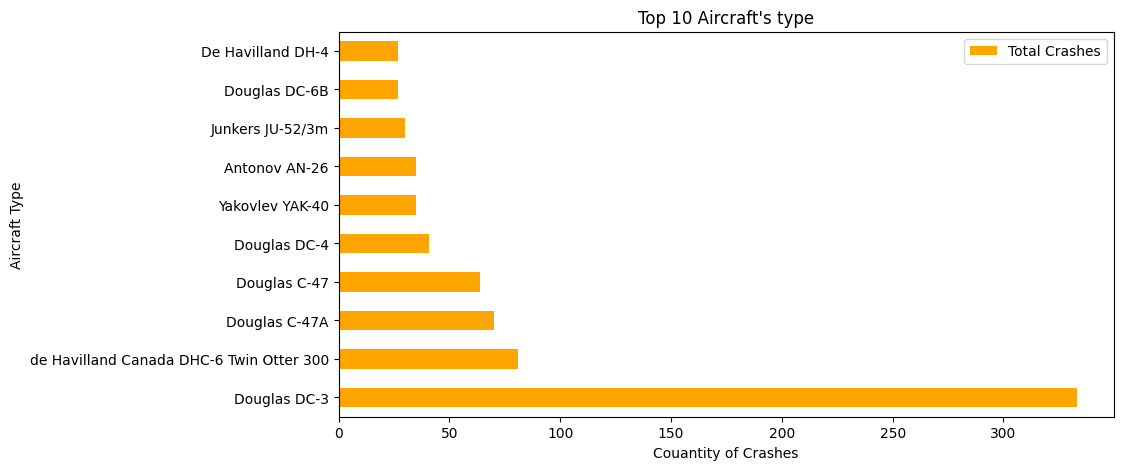

In [38]:
tenCountrysMost.plot(stacked=True,kind='barh',figsize=[10, 5] ,ylabel='Aircraft Type',xlabel='Couantity of Crashes', title= "Top 10 Aircraft's type", color='orange');

This graphic shows the 10 aircraft types which accumulated more air crashes in the 20th and 21st century. The Douglas DC-3 plane is the undeniable first place, with more than a 200 crashes over the second place: 'de Havilland Canada DH-6 Twin Otter 300'.


Knowing wich is the Aircraft type that has crashed the most see:

<b> How many crashes did this aircraft has along the 20th and 21st century?

<Axes: xlabel='decade'>

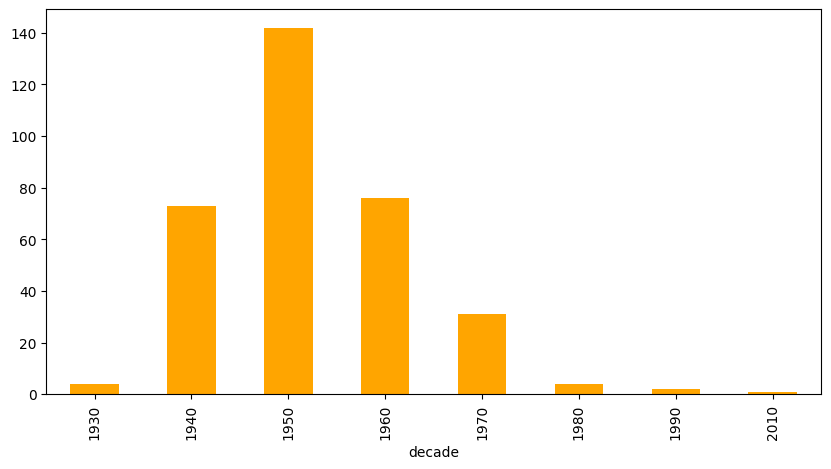

In [64]:
df[df['type'] == 'Douglas DC-3']['decade'].value_counts().sort_index().plot.bar(figsize=[10, 5], color='orange')


This amount of crashes definetly defined this airplane as insecure, at leats between 1940s to 1960s. 

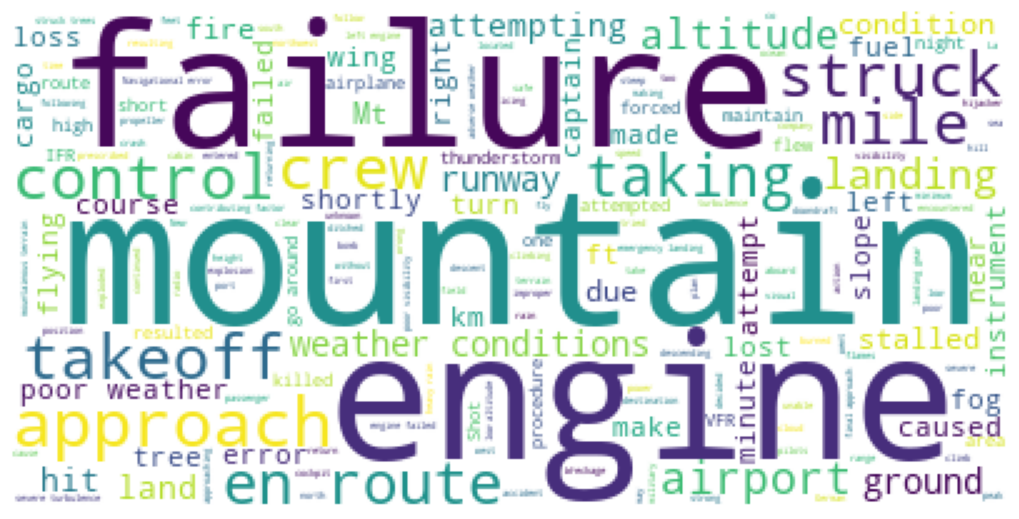

In [40]:
text = str(df[df['type'] == 'Douglas DC-3'].summary.tolist())

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('Crashed')
stopwords.add('pilot')
stopwords.add('flight')

wc = WordCloud(background_color="white", max_words=200,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

From this word cloud (that ignores the following words: 'aircraft','plane','Crashed','pilot','flight'), that remark the words 'failure', 'engine', and 'mountain', I infer I infer that the different Douglas DC-3's accidents and crashes were related to the engineering of the vehicle and the environment it faced. This one may not have been prepared for it.

# The Crashes Fatality

<b>Which gruop of people was the most subject to die along the centuries?

Crew vs Passengers

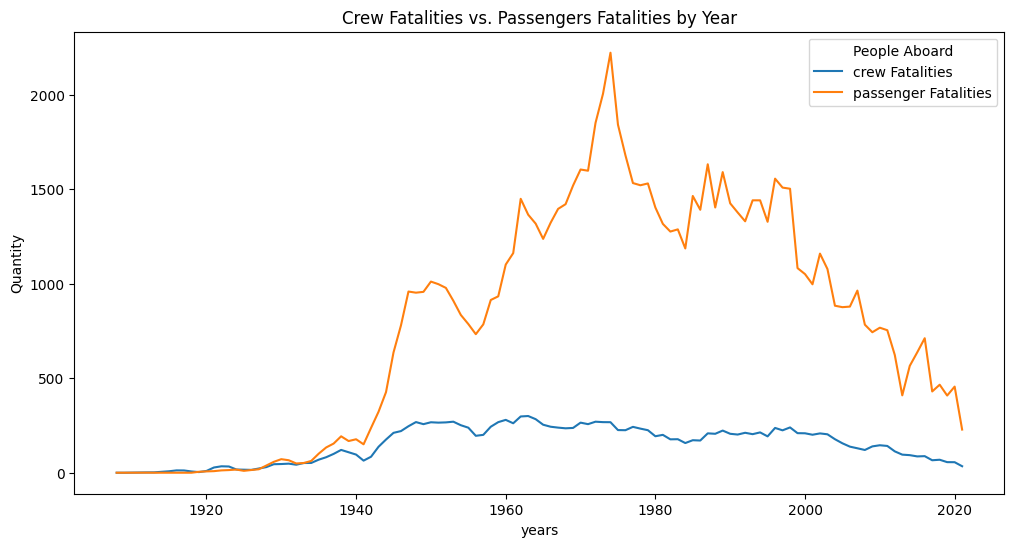

In [41]:
crew_fatalities_year = df[['crew_fatalities','year']].groupby(['year']).sum()
crew_fatalities_year = crew_fatalities_year.rolling(3).mean().fillna(0)

passenger_fatalities_year = df[['passenger_fatalities','year']].groupby(['year']).sum()
passenger_fatalities_year = passenger_fatalities_year.rolling(3).mean().fillna(0)

plt.figure(figsize=(12,6))


plt.plot(crew_fatalities_year, label='crew Fatalities')
plt.plot(passenger_fatalities_year, label='passenger Fatalities')

plt.legend(title='People Aboard')

plt.ylabel('Quantity')
plt.xlabel('years')
plt.title('Crew Fatalities vs. Passengers Fatalities by Year')


plt.show()

This time line graph shows the number of passenger's fatalities comparing to the number of crew's fatalities, alogn the years. Since 1940 to 2010 the passengers fatalities is way higer than the crew fatalities, which was expected up to a point, because the number of passenger is generaly way higer than the number of the crew members on a flight. However, this can also be caused thanks to the preparation, experience and profesional studies that the crew members acquire over the years. Besides the fact that at first sight the number of the crew fatalities looks very stable over the years, I consider significant the slight decrease of this number between the 2000s and 2020s, which coincides with the conclusion of the previous analysis, about the improvement in the aircraft tecnology and security.

In [42]:
a=df['passenger_fatalities'].sum()
b=df['crew_fatalities'].sum()
fig = px.pie(df, values = (a,b) ,names = ['passenger_fatalities','crew_fatalities'], title=('Percent of Fatalities: Crew vs Passengers'))
fig.show()

Thanks to this pie graphic we can cleary see that the crew fatalities is only the 15.9% of the total amount of fatalities of the people aboard, while the passengers ends are the rest 81.1%. Just to remind the viewer, this graph is only taking into acount the number of fatalities of the peopleo that were aboard of the aircraft at the moment of the crash, here is not reflected the number of fatalities written on the column 'ground'. The objective of this graphic is to see in a more visual and effective way the proportion of fatalities between the too gruop of peopleo aboard the aircraft.

<b>Added 2 columns to make a deeper analysis of the Fatality

The following analysis takes into account the fatality of the events. For this part of the analysis, I decided to create two new columns 'survived' and 'survival rate' so it is clear not only the fatalities but also the survival of the diferent crashes.

In [43]:
df['survived'] = df['all_aboard'] - df['fatalities']
df["survival rate"] = (100 * df["survived"]) / df['all_aboard']

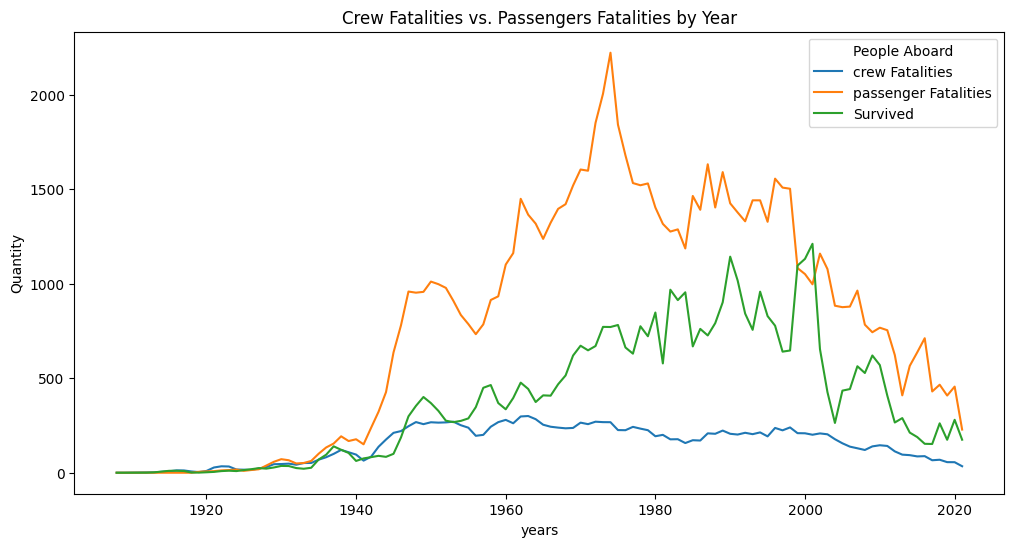

In [44]:
crew_fatalities_year = df[['crew_fatalities','year']].groupby(['year']).sum()
crew_fatalities_year = crew_fatalities_year.rolling(3).mean().fillna(0)

passenger_fatalities_year = df[['passenger_fatalities','year']].groupby(['year']).sum()
passenger_fatalities_year = passenger_fatalities_year.rolling(3).mean().fillna(0)

survived_year = df[['survived','year']].groupby(['year']).sum()
survived_year = survived_year.rolling(3).mean().fillna(0)

plt.figure(figsize=(12,6))
plt.plot(crew_fatalities_year, label='crew Fatalities')
plt.plot(passenger_fatalities_year, label='passenger Fatalities')
plt.plot(survived_year, label='Survived')

plt.legend(title='People Aboard')
plt.ylabel('Quantity')
plt.xlabel('years')
plt.title('Crew Fatalities vs. Passengers Fatalities by Year')


plt.show()

The new line in this graph shows the number of the people who were aboard and survived the crash. I decided to included this values as well, to see if over the years there were as much survived as fatalities. To my surprise and joy, between 1940 and 2000 the number od survivors tend to increase(with some ups and downs, of course), up to the point that during the 2000s the number of survivors were even higher than the fatalities. This is not only optimistic, but also a proof of the improvement in the security and safety of the diferents airlines or operators. However, after the 2000s their is a dramatic decrease, and after that, the number of suvivors tend to go down, as well as the fatalities, the cause of this may be the drecrease in the number of creshes.

Found a duplicate row, so procide to delete it.

In [45]:
df=df.drop( 4347, axis='index')

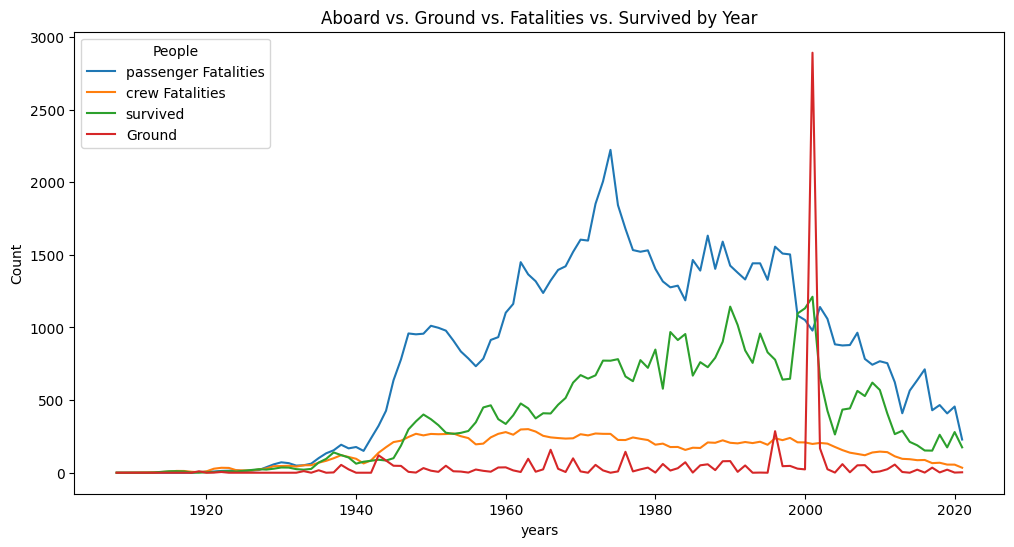

In [46]:
crew_fatalities_year = df[['crew_fatalities','year']].groupby(['year']).sum()
crew_fatalities_year = crew_fatalities_year.rolling(3).mean().fillna(0)

passenger_fatalities_year = df[['passenger_fatalities','year']].groupby(['year']).sum()
passenger_fatalities_year = passenger_fatalities_year.rolling(3).mean().fillna(0)

survived_year = df[['survived','year']].groupby(['year']).sum()
survived_year = survived_year.rolling(3).mean().fillna(0)

ground_year = df[['ground','year']].groupby(['year']).sum()


plt.figure(figsize=(12,6))

plt.plot(passenger_fatalities_year, label='passenger Fatalities')
plt.plot(crew_fatalities_year, label='crew Fatalities')
plt.plot(survived_year, label='survived')
plt.plot(ground_year, label='Ground')

plt.legend(title='People')

plt.ylabel('Count')
plt.xlabel('years')
plt.title('Aboard vs. Ground vs. Fatalities vs. Survived by Year')


plt.show()

The last but not least gruop of values I wanted to include in this time line graph was the column ground. This line seems to be quite stable along the 20th century, with small peaks, specially during the last 40th years of this century. This shows that before the 2000s, normaly, no matter how much the number of crashes increse, those did not have a big impact in the people on the ground (at least no big enough to increase a lot the number of fatalities). Nevertheless, this evidentialy changed right after the 2000, the number of ground fatalities increses a 5000% in less than a year. The reason of this enormous change it is probably the Terrorist Attack on the twin towers in 2001-09-11, in New York, USA.

<b> Outlier: during the  2001

What happend?

In [47]:
print(f'number of people killed by the event on the ground :{df[df["date"]=="2001-09-11"]["ground"][4346]}')
df[df['date']=='2001-09-11']['summary'][4346]

number of people killed by the event on the ground :2750


'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.'

In [48]:
print(f'number of people killed by the event on the ground :{df[df["date"]=="2001-09-11"]["ground"][4346]}')

number of people killed by the event on the ground :2750


# Operator examination

<b> Which are the Operators wirh the higher number of accumulated crashes?

Top 5 Operators with more accumlated crashes:

,operator,count
Ranking,,
1,Aeroflot,253
2,Military - U.S. Air Force,141
3,Air France,74
4,Deutsche Lufthansa,63
5,Military - U.S. Army Air Forces,43


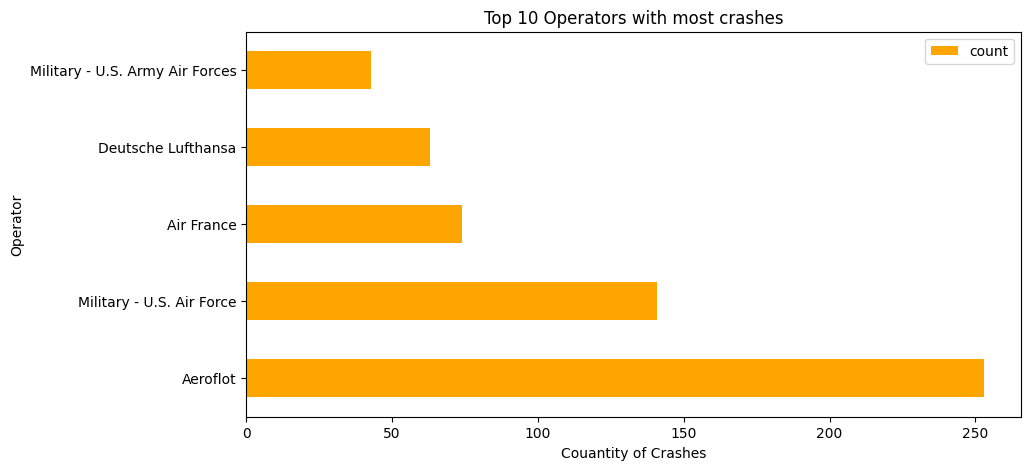

In [49]:
RankingOperatosCrash=pd.DataFrame(df['operator'].value_counts().sort_values(ascending=False).head(5))
RankingOperatosCrash['Ranking']=range(1, len(RankingOperatosCrash)+1)
RankingOperatosCrash=RankingOperatosCrash.reset_index()#.rename(columns={'type':'Aircraft Type'})
RankingOperatosCrash2=RankingOperatosCrash.drop(columns=['Ranking'])
RankingOperatosCrash2.set_index('operator').plot(stacked=True,kind='barh',figsize=[10, 5] ,ylabel='Operator',xlabel='Couantity of Crashes', title= "Top 10 Operators with most crashes", color='orange');
RankingOperatosCrash.set_index('Ranking')

<b> Which are the Operators wirh the higher number of Fatalities?

,operator,fatalities
Ranking,,
1,Pan American World Airways / KLM,583
2,Japan Air Lines,520
3,Saudi Arabian Airlines / Kazakhstan Airlines,349
4,Turkish Airlines (THY),346
5,Air India,329


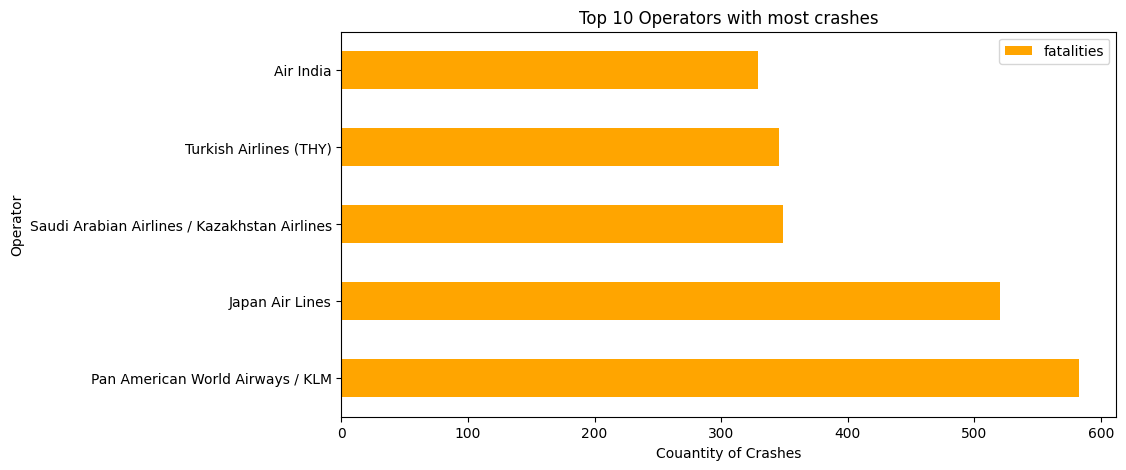

In [50]:
RankingOperatosFatal=pd.DataFrame(df.groupby(['operator'])['fatalities'].max().sort_values( ascending=False).head(5))
RankingOperatosFatal['Ranking']=range(1, len(RankingOperatosCrash)+1)
RankingOperatosFatal=RankingOperatosFatal.reset_index()#.rename(columns={'type':'Aircraft Type'})
RankingOperatosFatal2=RankingOperatosFatal.drop(columns=['Ranking'])
RankingOperatosFatal2.set_index('operator').plot(stacked=True,kind='barh',figsize=[10, 5] ,ylabel='Operator',xlabel='Couantity of Crashes', title= "Top 10 Operators with most crashes", color='orange');
RankingOperatosFatal.set_index('Ranking')

It is important to diference the Operator with most crashes to the most fatal Operator. The first one is the one that have been involved in most air crashed, while the second one is the one that have been in one or more catastrophic crashes that provoked a very high number of fatalities.

In [51]:
df.groupby(['operator'])['fatalities'].max().sort_values( ascending=False)

operator
Pan American World Airways / KLM                583
Japan Air Lines                                 520
Saudi Arabian Airlines / Kazakhstan Airlines    349
Turkish Airlines (THY)                          346
Air India                                       329
                                               ... 
Ararat Avia                                       0
China Airlines                                    0
Regional Compagnie Aerienne Europeenne            0
Reeve Aleutian Airways                            0
Centurian Air Cargo                               0
Name: fatalities, Length: 2268, dtype: Int64

'''write about a summary of al this part of the analisys'''

# MILITARY vs NO MILITARY

In [52]:
df["is Military"] = df['operator'].str.contains("Military",regex=False) #for later, so we can comparate military and no military

In [61]:
df['fatalities'].max()

583

In [63]:
df.iloc[2902]

date                                                  1977-03-27 00:00:00
route                                            Tenerife, Canary Islands
operator                                 Pan American World Airways / KLM
route_2                     Tenerife - Las Palmas / Tenerife - Las Palmas
type                                 Boeing B-747-121 / Boeing B-747-206B
registration                                                N736PA/PH-BUF
aircraft_id                                          19643/11 / 20400/157
all_aboard                                                            644
passengers_aboard                                                     614
crew_aboard                                                            30
fatalities                                                            583
passenger_fatalities                                                  560
crew_fatalities                                                        23
ground                                

In [62]:
df[df['fatalities']==df['fatalities'].max()]

,date,route,operator,route_2,type,registration,aircraft_id,all_aboard,passengers_aboard,crew_aboard,...,ground,summary,country,year,month,day,decade,survived,survival rate,is Military
2902,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644,614,30,...,0,Both aircraft were diverted to Tenerife becaus...,Canary Islands,1977,3,27,1970,61,9.47205,False


In [54]:
df

,date,route,operator,route_2,type,registration,aircraft_id,all_aboard,passengers_aboard,crew_aboard,...,ground,summary,country,year,month,day,decade,survived,survival rate,is Military
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Unknown,1,2,1,1,...,0,"During a demonstration flight, a U.S. Army fly...",Virginia,1908,9,17,1900,1,50.0,True
1,1909-09-07,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,SC1,NaN,1,0,1,...,0,Eugene Lefebvre was the first pilot to ever be...,France,1909,9,7,1900,0,0.0,False
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Unknown,NaN,5,0,5,...,0,First U.S. dirigible Akron exploded just offsh...,New Jersey,1912,7,12,1910,0,0.0,True
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,Unknown,NaN,1,0,1,...,0,The first fatal airplane accident in Canada oc...,Canada,1913,8,6,1910,0,0.0,False
4,1913-09-09,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),Unknown,NaN,20,<NA>,<NA>,...,0,The airship flew into a thunderstorm and encou...,Over the North Sea,1913,9,9,1910,6,30.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,...,0,The sightseeing helicopter crashed after missi...,Alaska,2021,3,28,2020,1,16.666667,False
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,Unknown,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,...,0,"While on final approach, in poor weather condi...",Nigeria,2021,5,21,2020,0,0.0,True
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,...,0,The plane was carrying military personnel and ...,Myanmar,2021,6,10,2020,2,14.285714,True
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,...,3,"While attempting to land at Jolo Airport, the ...",Philippines,2021,7,4,2020,46,47.916667,True


# The SUMMARY column:

To extrax the key words, and the ones that are repeted the most, in the <b>summary<b> column, I used a WORD CLOUD. This one is:

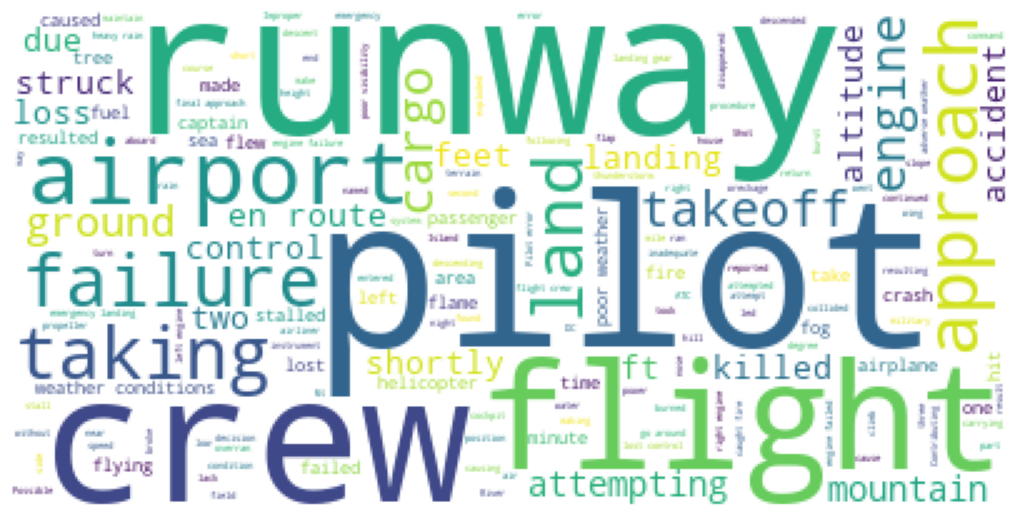

In [55]:
text = str(df.summary.tolist())

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('crashed')

wc = WordCloud(background_color="white", max_words=200,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [56]:
df.to_csv('df_AircraftAccident.CSV', sep=';')